# Building Basic Predictive Models using Linear Regression, KNN, Decision Tree over NYC Taxi Trip Dataset

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
data = pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
data.shape

(729322, 11)

In [5]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

#### In the Dataset, we have 729322 rows and 11 columns


# Dataset Variables

Dataset Variables are as follows :<br>
  ● vendor_id - code indicating provider associated with the trip record<br>
  ● id - unique identifier for each trip<br>
  ● pickup_datetime - date and time when the trip started<br>
  ● dropoff_datetime - date and time when the trip ended<br>
  ● passenger_count - number of passengers present during the trip<br>
  ● pickup_longitude - the longitude where the trip was started<br>
  ● pickup_latitude - the latitude where the trip was started<br>
  ● dropoff_longitude - the longitude where the trip was ended<br>
  ● dropoff_latitude - the latitude where the trip was ended<br>
  ● store_and_fwd_flag - The flag indicates that whether the connection during the trip with vehicle and vendor was lost due to any technical issue or not<br>
  ● trip_duration - duration of trip in seconds

In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
#sample of first 5 rows
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [8]:
#sample of last 5 rows
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
729317,id3905982,2,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,N,296
729318,id0102861,1,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,N,315
729319,id0439699,1,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,N,673
729320,id2078912,1,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,N,447
729321,id1053441,2,2016-01-01 17:24:16,2016-01-01 17:44:40,4,-74.003342,40.743839,-73.945847,40.712841,N,1224


### Checking for null values

In [9]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### In this dataset, we have 0 missing values and it's good to go further and work on each datatype of the dataset.

In [10]:
# Converting store_and_fwd_flag to category
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].astype('category')

In [11]:
# Converting pickup and dropoff datetime from object to datetime
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [12]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [1]:
# Using datetime to create new columns - day_name, day_number, month, pickup_hour

data['day_name'] = data.pickup_datetime.dt.day
data['month'] = data.pickup_datetime.dt.month
data['day_number'] = data.pickup_datetime.dt.weekday
data['pickup_hour'] = data.pickup_datetime.dt.hour

NameError: name 'data' is not defined

In [2]:
# Converting day_number, month, pickup_hour to category

data['month'] = data['month'].astype('category')
data['day_number'] = data['day_number'].astype('category')
data['pickup_hour'] = data['pickup_hour'].astype('category')

NameError: name 'data' is not defined

In [15]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
day_name                      object
month                       category
day_number                  category
pickup_hour                 category
dtype: object

#### Looking at the dataset, we come to a point that the dataset is time and distance related. So, we can calculate the distance travelled for each and every trip.

In [16]:
# Importing geopy which can be used for distance calculation
import geopy.distance

def calc_dist(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    dropoff = (df['dropoff_latitude'], df['dropoff_longitude'])
    return geopy.distance.distance(pickup, dropoff).km

In [17]:
# Adding the distance column in our dataframe

data['distance'] = data.apply(lambda x: calc_dist(x), axis=1)

##### We can calculate the speed of the vehicle at each trip by the distance and the trip duration.

In [18]:
data['speed'] = (data.distance/(data.trip_duration/3600))

In [19]:
# Considering only upto 6 passenger count to prevent any of the outlier

data = data[(data['passenger_count'] <= 6) & (data['passenger_count'] >0)]

In [20]:
# Converting all the categorical variables to numerical

dummy = pd.get_dummies(data.store_and_fwd_flag, prefix = 'flag')
data = pd.concat([data, dummy], axis =1)

dummy = pd.get_dummies(data.vendor_id, prefix = 'vendor_id')
data = pd.concat([data, dummy], axis =1)

dummy = pd.get_dummies(data.month, prefix = 'month')
data = pd.concat([data, dummy], axis = 1)

dummy = pd.get_dummies(data.day_number, prefix = 'day_number')
data = pd.concat([data,dummy], axis = 1)

dummy = pd.get_dummies(data.pickup_hour, prefix = 'pickup_hour')
data = pd.concat([data, dummy], axis = 1)

dummy = pd.get_dummies(data.passenger_count, prefix = 'passenger_count')
data = pd.concat([data, dummy], axis = 1)

In [21]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour_20,pickup_hour_21,pickup_hour_22,pickup_hour_23,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,0,0,1,0,0,0,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,0,0,0,1,0,1,0,0,0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,0,0,0,0,0,1,0,0,0,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,0,0,0,0,0,0,0,0,0,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,0,0,0,0,1,0,0,0,0,0


#### Droping out the unwanted columns from the dataframe.

In [22]:
data = data.drop(['id'], axis = 1)

In [23]:
data = data.drop(['store_and_fwd_flag'], axis = 1)

In [24]:
data = data.drop(['vendor_id'], axis = 1)

In [25]:
data = data.drop(['pickup_datetime'], axis = 1)

In [26]:
data = data.drop(['dropoff_datetime'], axis = 1)

In [27]:
data = data.drop(['day_name'], axis = 1)

##### Plotting distribution of trip duration and distance for checking outliers.

Text(0.5, 1.0, 'Distribution of trip duration')

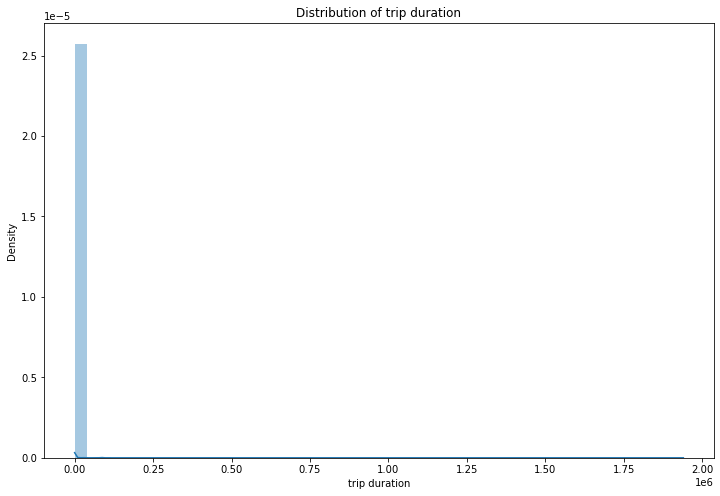

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(data['trip_duration'])
plt.xlabel('trip duration')
plt.title('Distribution of trip duration')

Text(0.5, 1.0, 'Distribution of distance')

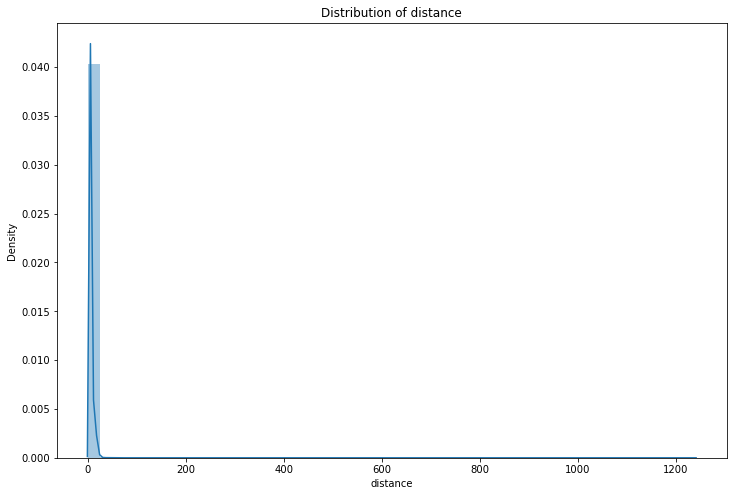

In [29]:
plt.figure(figsize=(12, 8))
sns.distplot(data['distance'])
plt.xlabel('distance')
plt.title('Distribution of distance')

#### We have to remove the potential outliers from distance and trip duration. Here, we have chosen the trip duration part normally greater than 10 seconds and less than 0.5 day.

In [30]:
# Removing potential distance outlier

data = data[(data['distance'] < data['distance'].quantile(0.95)) & (data['distance'] > data['distance'].quantile(0.05))]

# Removing potential trip duration outlier

data = data[(data['trip_duration'] < 3*3600) & (data['trip_duration'] > 10)]
data = data[(data['trip_duration'] < data['trip_duration'].quantile(0.95)) & (data['trip_duration'] > data['trip_duration'].quantile(0.05))]

# Selecting Metric for Evaluation and Building Simple Model

In [31]:
# Creating a raw data copy
data_copy  = data

In [32]:
from sklearn.utils import shuffle

# Shuffling the dataset
data_copy = shuffle(data_copy, random_state = 30)

# Creating 4 divisions
div = int(data_copy.shape[0]/4)

# We will divide the 4 division - 3 for training part and 1 for testing

train = data_copy.loc[:3*div+1,:]
test = data_copy.loc[3*div+1:]

### Calculating Mean of trip duration

In [33]:
# storing mean in the test set as a new column
test['mean'] = train['trip_duration'].mean()

# calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE

mean_error = MAE(test['trip_duration'], test['mean'])
mean_error

302.9729421962103

### I chosed the most appropriate Evaluation metric for this dataset - Mean Absolute Error because I have used the distance and speed variable concept which is related to time duration also most of the outliers in the data are removed and so mean squared or root mean squared error will not be felt required

# Linear Regression with Regularization

In [34]:
# separating independent and dependent variables
x5 = data.drop(['trip_duration'], axis =1)
y5 = data['trip_duration']
x5.shape, y5.shape

((589827, 57), (589827,))

In [35]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x5, test_x5, train_y5, test_y5 = train_test_split(x5, y5, random_state = 65)

In [36]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as Mae

In [37]:
# Creating instance of Linear Regression
lin_reg = LR(normalize = True)

# Fitting the model
lin_reg.fit(train_x5, train_y5)

LinearRegression(normalize=True)

In [38]:
# Predicting over the train set and calculating the errors
train_pred = lin_reg.predict(train_x5)
k1 = Mae(train_pred, train_y5)
print('Training Mean Absolute Error is- ', k1)

Training Mean Absolute Error is-  106.55902525035604


In [39]:
# Predicting over the test set and calculating the errors
test_pred = lin_reg.predict(test_x5)
k1 = Mae(test_pred, test_y5)
print('Test Mean Absolute Error is- ', k1)

Test Mean Absolute Error is-  106.45726550791078


In [40]:
# Importing Ridge from sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [41]:
# Creating Ridge Regression with alpha values
reg_cv = RidgeCV(alphas = [0.1, 0.5, 1.0, 10.0])

In [42]:
#fitting the model into ridge cv
model_cv = reg_cv.fit(x5, y5)

In [43]:
#finding the best value of alpha
model_cv.alpha_

0.5

In [44]:
#Selecting alpha=0.5 for ridge regression
rid_reg = Ridge(alpha = 0.5)

In [45]:
# fitting the model on the training set
rid_reg.fit(train_x5,train_y5)

Ridge(alpha=0.5)

In [46]:
#prediction on the training set
pred_reg_train = rid_reg.predict(train_x5)
linear_train = Mae(train_y5, pred_reg_train)
linear_train

106.28311777605897

In [47]:
Linear_training = 1 - (linear_train/mean_error)
Linear_training

0.6491993080120393

In [48]:
#prediction on the test set
pred_reg_test = rid_reg.predict(test_x5)
linear_test = Mae(test_y5, pred_reg_test)
linear_test

106.18321271938494

In [49]:
Linear_testing = 1 - (linear_test/mean_error)
Linear_testing

0.64952905711752

# Decision Tree Model 

In [50]:
data.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'month',
       'day_number', 'pickup_hour', 'distance', 'speed', 'flag_N', 'flag_Y',
       'vendor_id_1', 'vendor_id_2', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'day_number_0', 'day_number_1',
       'day_number_2', 'day_number_3', 'day_number_4', 'day_number_5',
       'day_number_6', 'pickup_hour_0', 'pickup_hour_1', 'pickup_hour_2',
       'pickup_hour_3', 'pickup_hour_4', 'pickup_hour_5', 'pickup_hour_6',
       'pickup_hour_7', 'pickup_hour_8', 'pickup_hour_9', 'pickup_hour_10',
       'pickup_hour_11', 'pickup_hour_12', 'pickup_hour_13', 'pickup_hour_14',
       'pickup_hour_15', 'pickup_hour_16', 'pickup_hour_17', 'pickup_hour_18',
       'pickup_hour_19', 'pickup_hour_20', 'pickup_hour_21', 'pickup_hour_22',
       'pickup_hour_23', 'passenger_count_1', 'passenger_count_2',
       'passenger_count_3', 'passenger_cou

In [51]:
#Shuffling the dataset

from sklearn.utils import shuffle
data = shuffle(data, random_state = 42)

In [52]:
#Separating the independent and dependent variables

x2 = data.drop(['trip_duration'], axis = 1)
y2 = data['trip_duration']

In [53]:
#Importing library and creating the train and test set

from sklearn.model_selection import train_test_split
train_x6, test_x6, train_y6, test_y6 = train_test_split(x2, y2, random_state = 101, test_size = 0.20)

In [54]:
#Creating the train and validation set

train_x7, valid_x6, train_y7, valid_y6 = train_test_split(train_x6, train_y6, random_state = 101, test_size = 0.20)

In [55]:
#Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dec_mod = DecisionTreeRegressor(random_state = 10)

In [56]:
dec_mod.fit(train_x7, train_y7)

DecisionTreeRegressor(random_state=10)

In [57]:
#Checking the train score

dec_mod.score(train_x7, train_y7)

1.0

In [58]:
#Checking the validation score

dec_mod.score(valid_x6, valid_y6)

0.9998153525565519

#### We noticed that both train and validation have a good score and we need to check whether there's overfitting and to interpret that how different properties influence the tree. Next, interpreting accuracy relative to max depth

In [59]:
train_acc = []
validation_acc = []
for dep in range(1, 15):
    dec_mod = DecisionTreeRegressor(max_depth = dep, min_impurity_split = 1000, random_state=10)
    dec_mod.fit(train_x7, train_y7)
    train_acc.append(dec_mod.score(train_x7, train_y7))
    validation_acc.append(dec_mod.score(valid_x6, valid_y6))

In [60]:
#Collecting this data into a dataframe
df = pd.DataFrame({'max_depth' : range(1, 15), 'tr_acc' : train_acc, 'valid_acc' : validation_acc})
df.head()

,max_depth,tr_acc,valid_acc
0,1,0.348427,0.347822
1,2,0.498316,0.496411
2,3,0.703810,0.701247
3,4,0.820469,0.819176
4,5,0.899602,0.898004


Text(0, 0.5, 'performance')

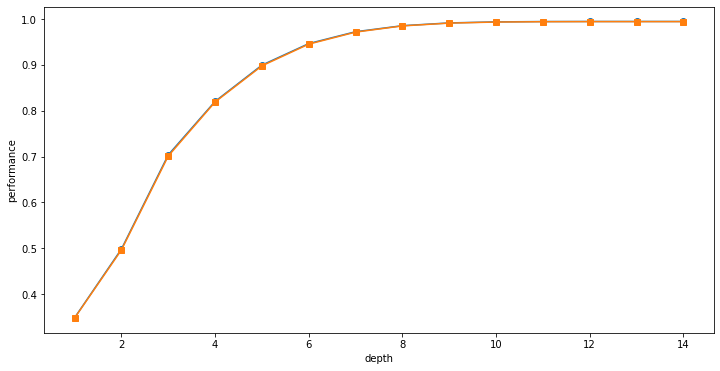

In [61]:
#Plotting maxdepth relative
plt.figure(figsize = (12, 6))
plt.plot(df['max_depth'], df['tr_acc'], marker = 'o')
plt.plot(df['max_depth'], df['valid_acc'], marker = 's')
plt.xlabel('depth')
plt.ylabel('performance')


#### The best Maximum Depth is at 9 while further plot is constant and overfitting might be the reason for this.

In [62]:
#Creating a function for iterating over different max features and finding train and validation score

train_accura = []
validation_accura = []
for feat in range(1, 35):
    dec_mod = DecisionTreeRegressor(max_depth = 9, max_features = feat, min_samples_leaf = 1000, random_state = 10)
    dec_mod.fit(train_x7, train_y7)
    train_accura.append(dec_mod.score(train_x7, train_y7))
    validation_accura.append(dec_mod.score(valid_x6, valid_y6))

In [63]:
#Collecting the above data into a dataframe
df = pd.DataFrame({'max_features':range(1, 35), 'train_acc':train_accura, 'valid_acc':validation_accura})
df.head()

,max_features,train_acc,valid_acc
0,1,0.026221,0.025147
1,2,0.321571,0.319832
2,3,0.141577,0.144611
3,4,0.359889,0.354934
4,5,0.177230,0.171587


Text(0, 0.5, 'Performance')

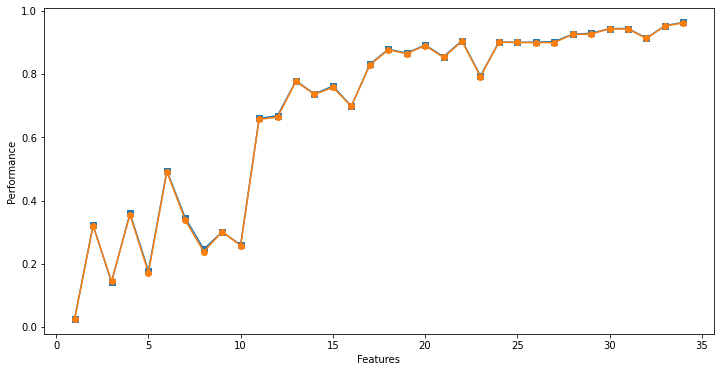

In [64]:
#Plotting the max features according to the model score

plt.figure(figsize =(12, 6))
plt.plot(df['max_features'], df['train_acc'], marker = 's')
plt.plot(df['max_features'], df['valid_acc'], marker = 'o')
plt.xlabel('Features')
plt.ylabel('Performance')


#### The best no. of feature from the plot is 31. Moving on selecting the max feature and depth and finding train and test score.

In [65]:
DecisionTreeRegressor(max_depth = 9, max_features = 31, min_samples_leaf = 1000, random_state =10)

DecisionTreeRegressor(max_depth=9, max_features=31, min_samples_leaf=1000,
                      random_state=10)

In [66]:
#Fitting this model

dec_mod.fit(train_x7, train_y7)

DecisionTreeRegressor(max_depth=9, max_features=34, min_samples_leaf=1000,
                      random_state=10)

In [67]:
#Training Score
dec_train = dec_mod.score(train_x7, train_y7)
dec_train

0.9636017176508239

In [68]:
#Validation Score
dec_mod.score(valid_x6, valid_y6)

0.9620747110819923

### Finally, at last we see how this model performs on the test data

In [69]:
dec_test = dec_mod.score(test_x6, test_y6)
dec_test

0.9620526513788826

### We get to see that the data didn't overfit and a good test score is obtained.

### Drawing Decision Tree

In [70]:
from sklearn import tree


In [71]:
deci_tree = tree.export_graphviz(dec_mod, out_file = 'decision_tree.dot', feature_names = train_x6.columns, max_depth = 2, filled = True)

In [72]:
!dot -Tpng decision_tree.dot -o decision_tree.png

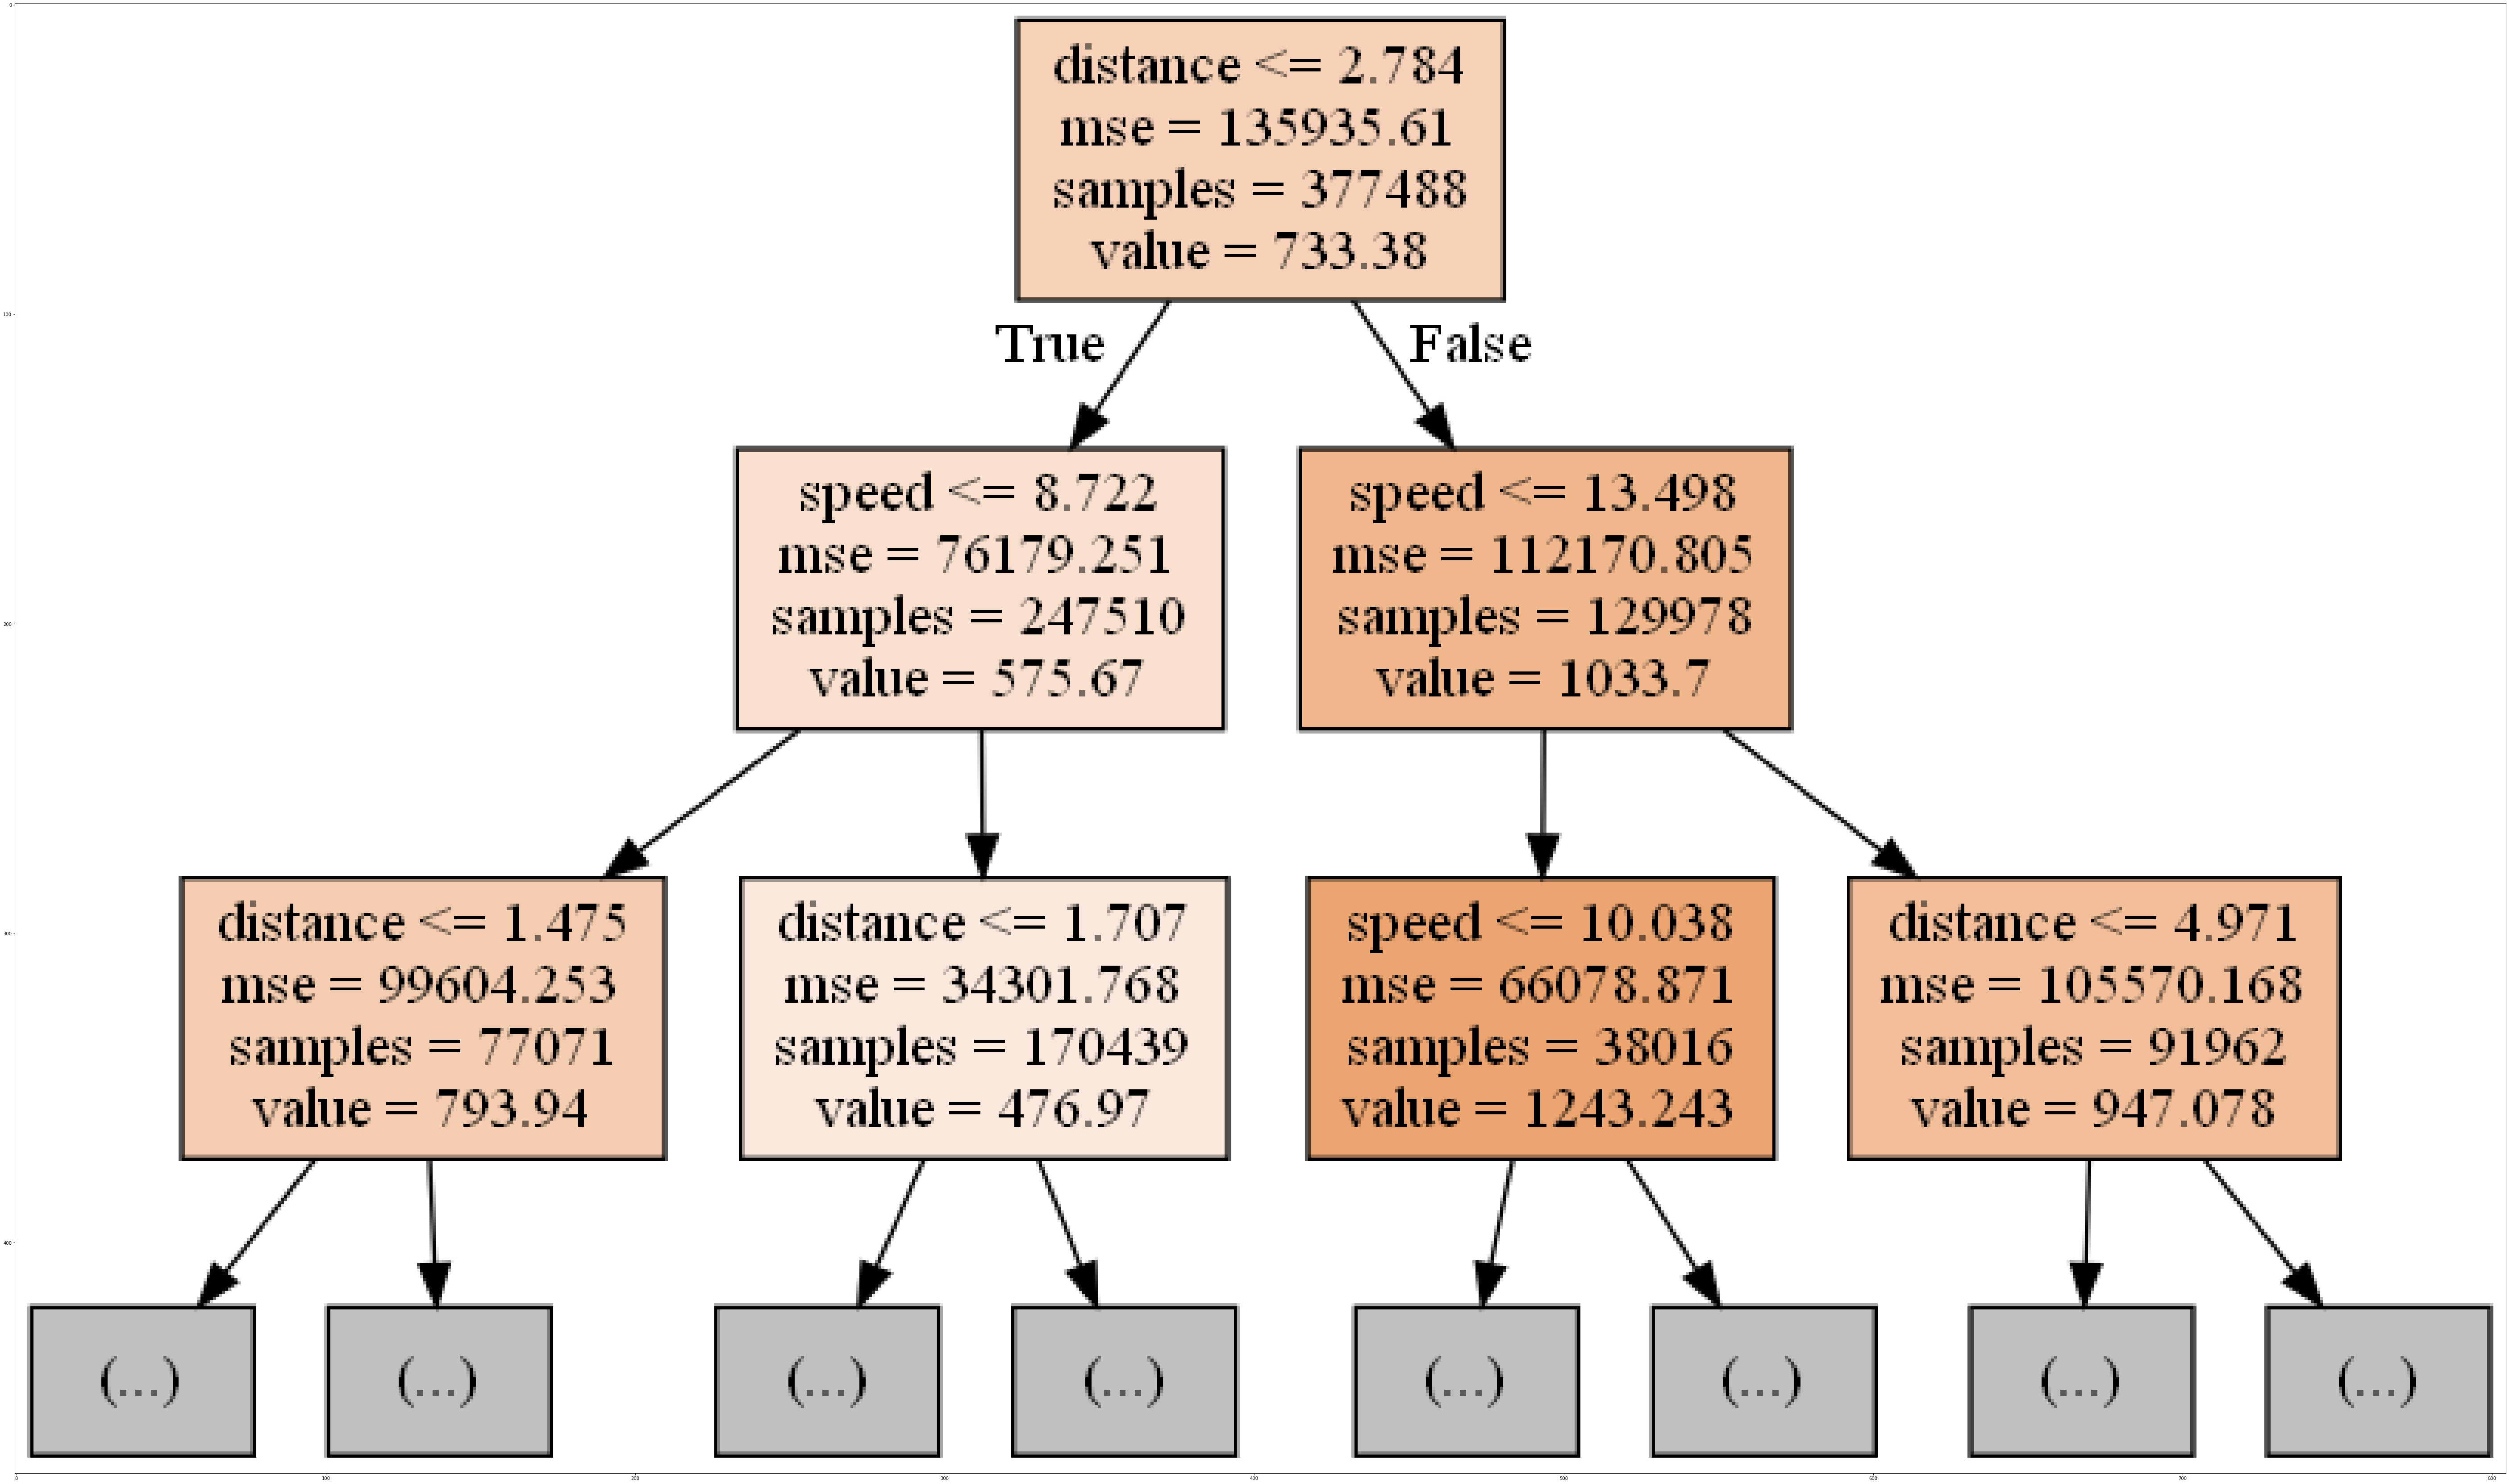

In [73]:
img = plt.imread('decision_tree.png')
plt.figure(figsize = (100, 100))
plt.imshow(img)

#### In the decision tree plot, we can see that the distance and speed variables takes precedence and predictions that are accurate is based on these two.

# K-Nearest Neighbour Model

In [74]:
#Separating dependent and independent variables

x = data.drop(['trip_duration'], axis =1)
y = data['trip_duration']

In [75]:
#Importing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scale = scaler.fit_transform(x)

In [76]:
frame = pd.DataFrame(x_scale, columns= x.columns)

In [77]:
#Creating train and test sets
from sklearn.model_selection import train_test_split
train_x3, test_x3, train_y3, test_y3 = train_test_split(frame,y, random_state = 65)

In [78]:
# Importing KNN Regressor and Evaluation Metric MAE
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.metrics import mean_absolute_error as mae

In [83]:
# Creating instance of KNN
regr = knn(n_neighbors = 2)

# Fitting the model
regr.fit(train_x3, train_y3)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
train_pred = regr.predict(train_x3)
k2 = mae(train_y3, train_pred)
KNN_train = 1 - (k2/mean_error)
print('Train MAE score is -', KNN_train)

In [ ]:
test_pred = regr.predict(test_x3)
k4 = MAE(test_pred, test_y3)
KNN_Test = 1 - (k4/mean_error)
print('Test MAE score is -', KNN_Test)

### With respect to KNN model, after trying over different values of n neighbors and using predict for the training dataset, there is a failure of the output due to lack of computational capacity or the system freezes. With this model, there is no particular conclusion. Even after trying the concept of k values, still the same problem arises. It is better not to use KNN for this dataset.

## Comparing Models

In [85]:
p = {'type':['train','test','train','test'],
     'model': ['linear','linear','decision_tree','decision_tree'],
     'score': [Linear_training, Linear_testing,dec_train,dec_test]
    }


df = pd.DataFrame(p)

<AxesSubplot:xlabel='model', ylabel='score'>

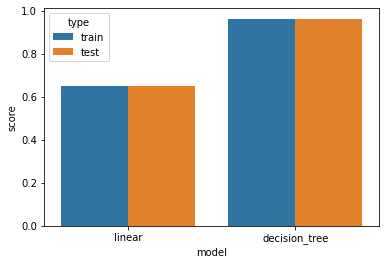

In [86]:
sns.barplot(data = df,x = 'model' ,y = 'score',hue = 'type',ci = None )

### Looking at the plot,  it is clear that the Decision tree is giving best output for prediction of data.